In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

print(data.shape)
print(target.shape)

(6497, 3)
(6497,)


In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target= train_test_split(
data, target, stratify=target, random_state= 42)

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42) # 데이터 샘플링에 대한 랜덤

In [6]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

score = cross_validate(dt, train_input, train_target, cv=10)

In [7]:
score['test_score'].mean()

0.8612465075571414

In [21]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
papam = {'max_depth': [2,3,4,5]}

gs = GridSearchCV(dt, param_grid=papam, cv=5, n_jobs=-1)

In [22]:
gs.fit(train_input, train_target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5]})

<function matplotlib.pyplot.show(close=None, block=None)>

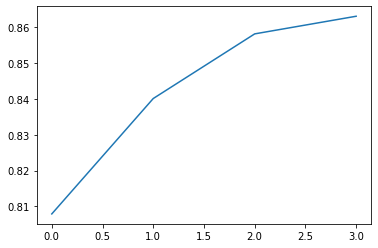

In [26]:
plt.plot(gs.cv_results_['mean_test_score'])
plt.show

In [17]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.8723316912972086


In [27]:
gs.best_params_

{'max_depth': 5}

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier

rf = RandomForestClassifier(n_estimators=100,
                           criterion='gini',
                           n_jobs=-1)
rf.fit(train_input, train_target)

scores = cross_validate(rf, train_input, train_target, cv=10,
                       return_train_score=True)

In [33]:
scores['test_score'].mean()
scores['train_score'].mean()

0.9979474600287975

In [37]:
print(rf.feature_importances_)
print(wine.columns)

[0.24033741 0.49040024 0.26926235]
Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')
